# IMAGE ANALYSIS, IMAGE #1

Libary: OpenCV <br>
Aim: identify roots from binary image and collect found root information into csv-file

In [55]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ipywidgets import *
from IPython.display import clear_output, display
import math

In [56]:
# import DETECT_ROOT funcitons 

from root_functions import scale_crop_gray, edge_areas_mask, change_areas_mask, light_areas_mask_color, remove_isolated_pixels
from root_functions import add_text, grab_contours, sort_contours

In [57]:
from ipywidgets import *
from tkinter import Tk, filedialog
%gui tk

In [58]:
# select image

def open_file():
    # Create Tk root
    root = Tk()
    # Hide the main window
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)

    infiles = filedialog.askopenfilename(multiple=True)
    return infiles


In [59]:
filename1 = open_file()

In [60]:
filename1

('C:/Users/OKa/Documents/_OKa/III. JAKSO/4. DS project/ML images/1.jpeg',)

In [61]:
# read image

im1 = cv2.imread(filename1[0], 1)

# Convert the image to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

# Convert the imager to binary
ret, im1_binary = cv2.threshold(im1,100,255,cv2.THRESH_BINARY)

# th2 = cv2.adaptiveThreshold(im1_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
# th3 = cv2.adaptiveThreshold(im1_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

# Get rescaled and cropped images in color and gray
# im1, im1_gray = scale_crop_gray(im1)

<Figure size 7200x7200 with 0 Axes>

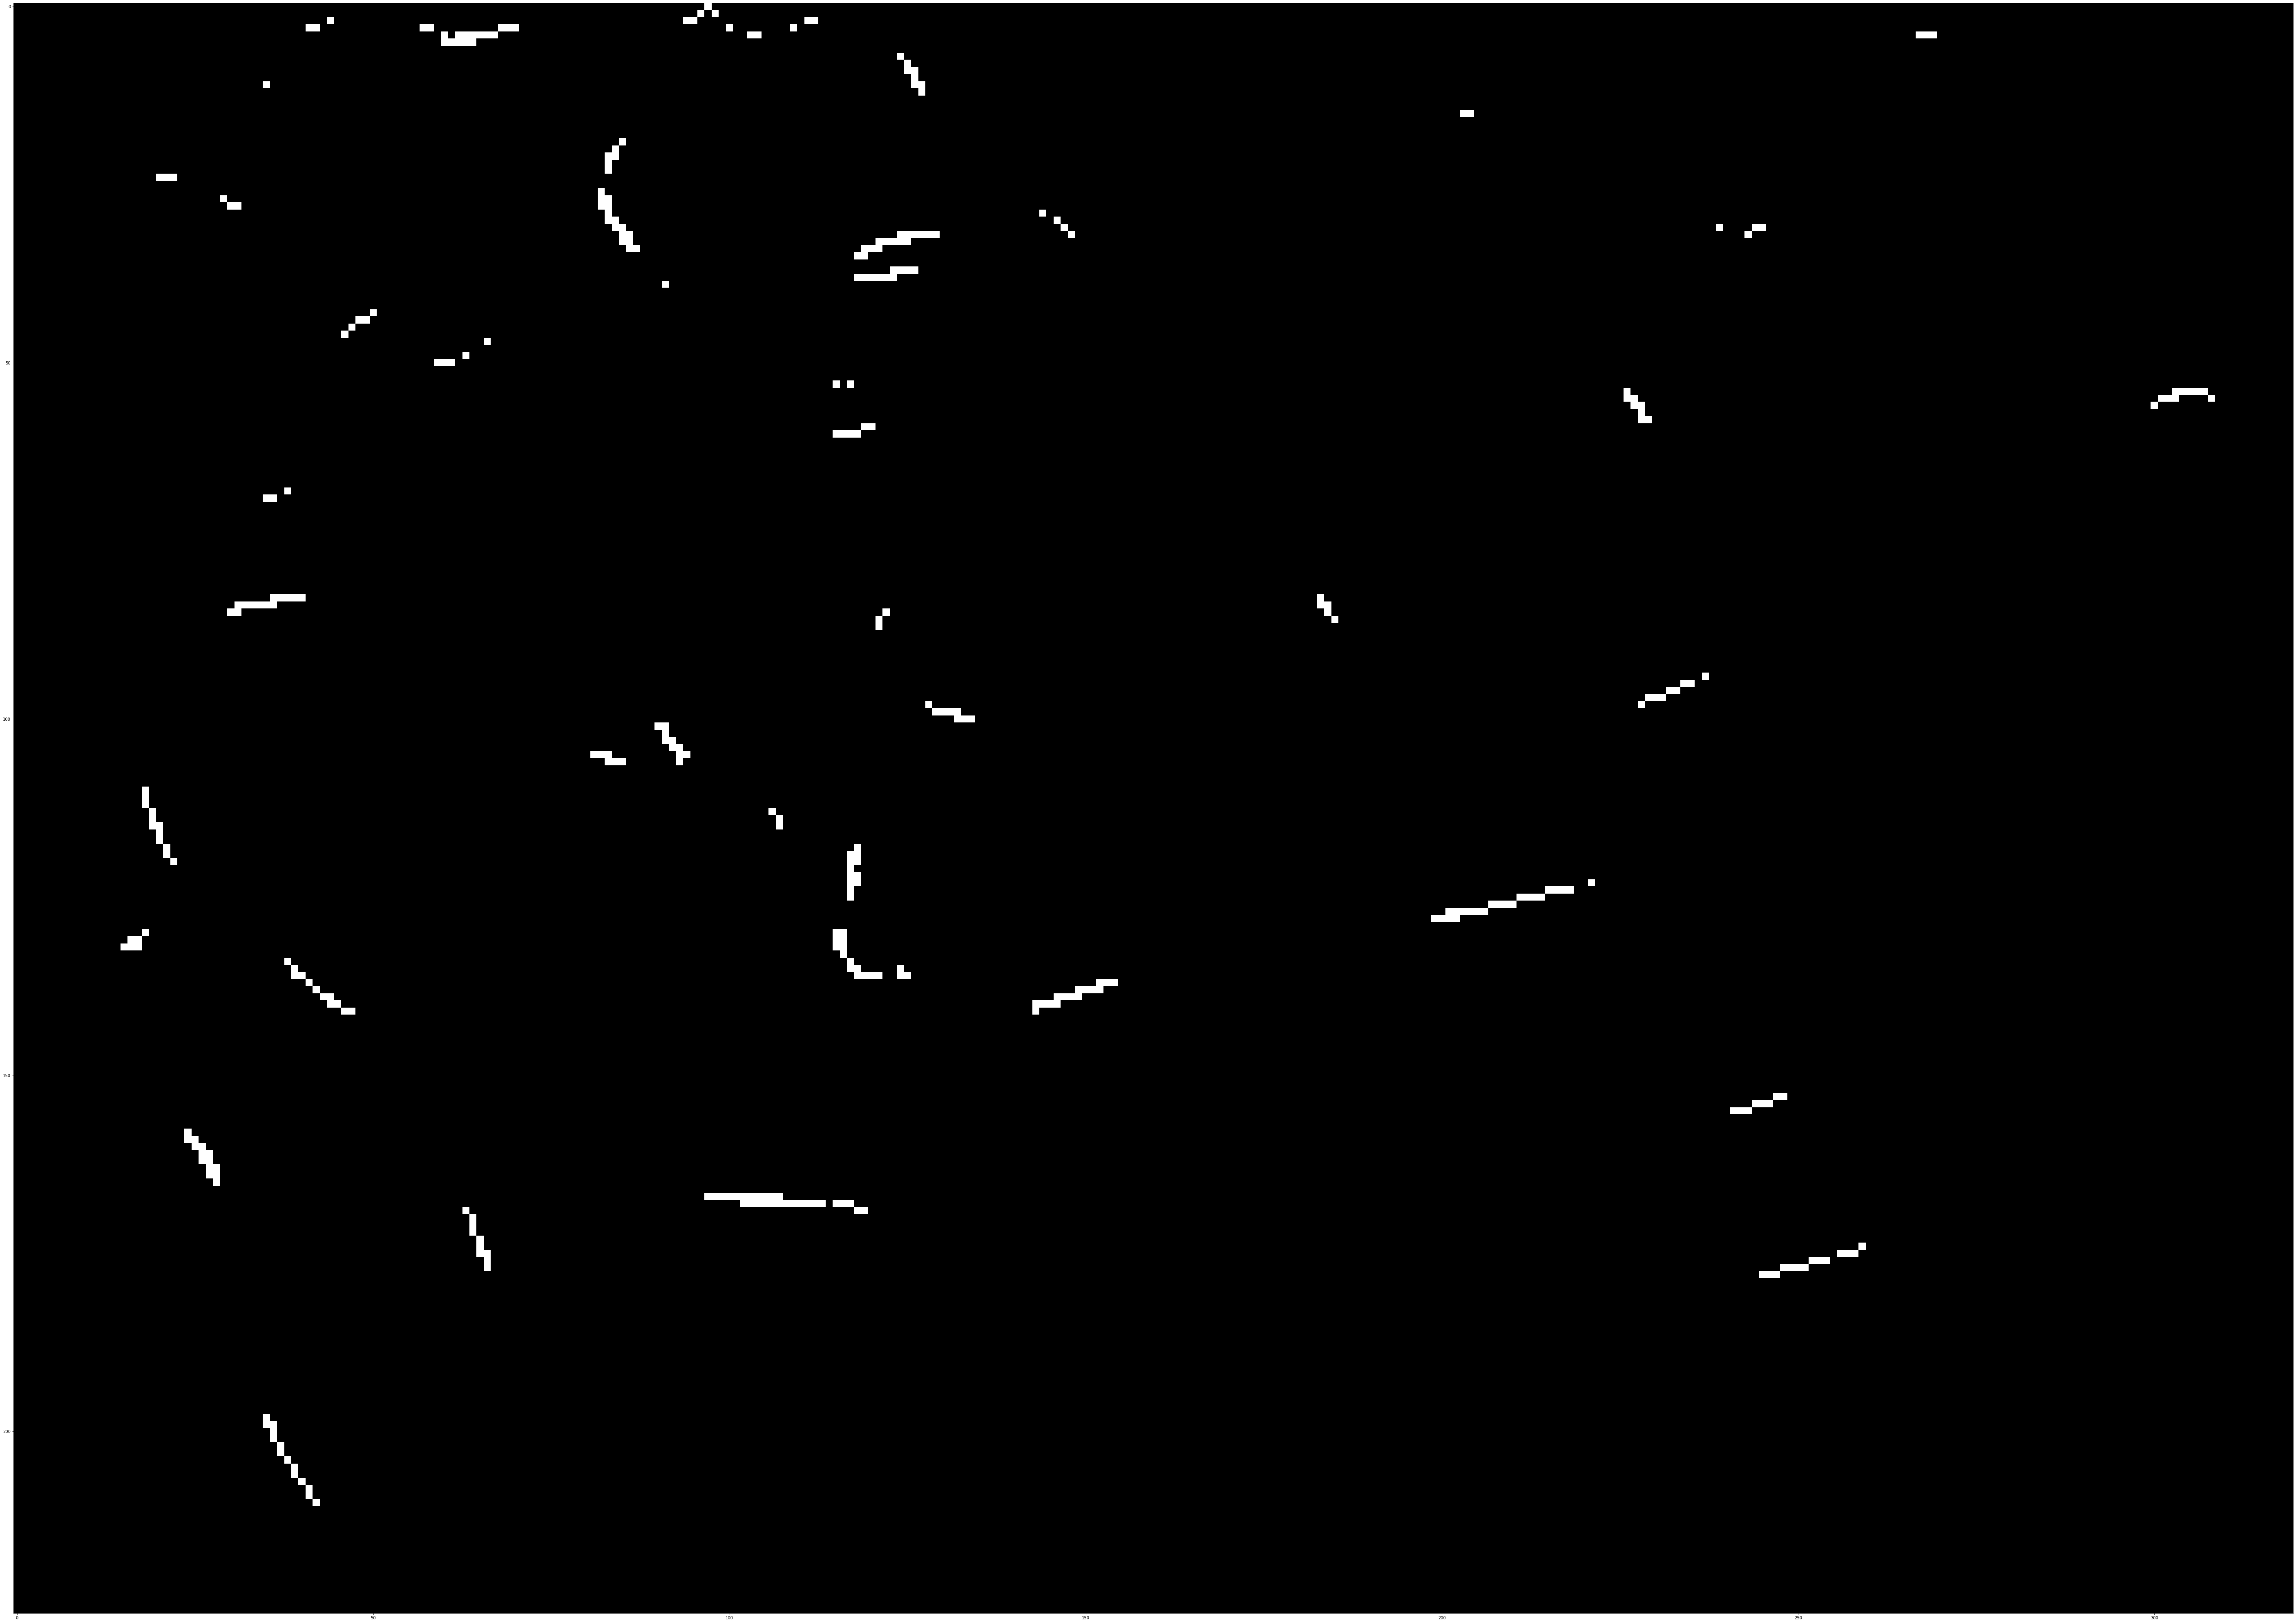

In [62]:
# Display image

plt.figure(figsize=(100,100))
plt.imshow(im1_binary)

In [63]:
set( tuple(v) for m2d in im1 for v in m2d )

{(0, 0, 0),
 (1, 1, 1),
 (2, 2, 2),
 (3, 3, 3),
 (4, 4, 4),
 (5, 5, 5),
 (6, 6, 6),
 (7, 7, 7),
 (8, 8, 8),
 (9, 9, 9),
 (10, 10, 10),
 (11, 11, 11),
 (12, 12, 12),
 (13, 13, 13),
 (14, 14, 14),
 (15, 15, 15),
 (16, 16, 16),
 (17, 17, 17),
 (18, 18, 18),
 (19, 19, 19),
 (20, 20, 20),
 (21, 21, 21),
 (22, 22, 22),
 (23, 23, 23),
 (24, 24, 24),
 (25, 25, 25),
 (26, 26, 26),
 (27, 27, 27),
 (28, 28, 28),
 (29, 29, 29),
 (30, 30, 30),
 (31, 31, 31),
 (32, 32, 32),
 (33, 33, 33),
 (34, 34, 34),
 (35, 35, 35),
 (36, 36, 36),
 (37, 37, 37),
 (38, 38, 38),
 (39, 39, 39),
 (40, 40, 40),
 (41, 41, 41),
 (42, 42, 42),
 (43, 43, 43),
 (44, 44, 44),
 (45, 45, 45),
 (46, 46, 46),
 (47, 47, 47),
 (48, 48, 48),
 (49, 49, 49),
 (50, 50, 50),
 (51, 51, 51),
 (52, 52, 52),
 (53, 53, 53),
 (54, 54, 54),
 (55, 55, 55),
 (56, 56, 56),
 (57, 57, 57),
 (58, 58, 58),
 (59, 59, 59),
 (60, 60, 60),
 (61, 61, 61),
 (62, 62, 62),
 (63, 63, 63),
 (64, 64, 64),
 (65, 65, 65),
 (66, 66, 66),
 (67, 67, 67),
 (68, 68, 

### Find contours

Find countours and collect contour coordinates to a dictionary<br>
If radius value is zero, root is not taken --> BUT, SHOULD THE RADIUS CRITERIA BE BIGGER THAN ZERO??? 

In [64]:
# find contours

def find_contours(filename, image, mask):
    # find the contours in the mask, then sort them from left to right
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = grab_contours(cnts)
    
    # Sort contours from left to right
    cnts = sort_contours(cnts)[0]
    print(f'Contours: {len(cnts)}')

    # loop over the contours and collect coordinates to the dictionary
    coordinates = {}
    imageID = 0
    for c in cnts:
    # get the bright spot of the image
        (x, y, w, h) = cv2.boundingRect(c)
        ((cX, cY), radius) = cv2.minEnclosingCircle(c)
        if int(radius) <= 5:
            pass
        else:
            imageID += 1
            # coordinates[i] = [filename.split("_")[3], filename, (int(cX), int(cY)), int(radius), 'Y']
            coordinates[imageID] = [filename[0].split('/')[-1], (int(cX), int(cY)), int(radius), 0]
    return coordinates

In [65]:
# create dictionary with image root data

im1_COORDINATES = find_contours(filename1, im1, im1_gray)

Contours: 176


In [66]:
# draw circle around roots and mark center of the circle

def draw_circles_around(image, coordinates, color):
    for i, v in coordinates.items():
        cv2.circle(image, (int(v[1][0]), int(v[1][1])), v[2], color, 1)
        cv2.circle(image, (int(v[1][0]), int(v[1][1])), 0, color, 1)

In [67]:
im1_COORDINATES[1]

['1.jpeg', (17, 119), 16, 0]

In [68]:
# draw circles around roots of selected image

draw_circles_around(im1, im1_COORDINATES, (0, 255, 0))


In [69]:
# add text --> root ID

def add_Text(image, coordinates):
    i = 0
    for k, v in coordinates.items():
        i += 1
        cv2.putText(image, "#{}".format(i), (int(v[1][0]+5), int(v[1][1]) - 5), cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0, 255, 0), thickness=1)

In [70]:
add_Text(im1, im1_COORDINATES)

<Figure size 7200x7200 with 0 Axes>

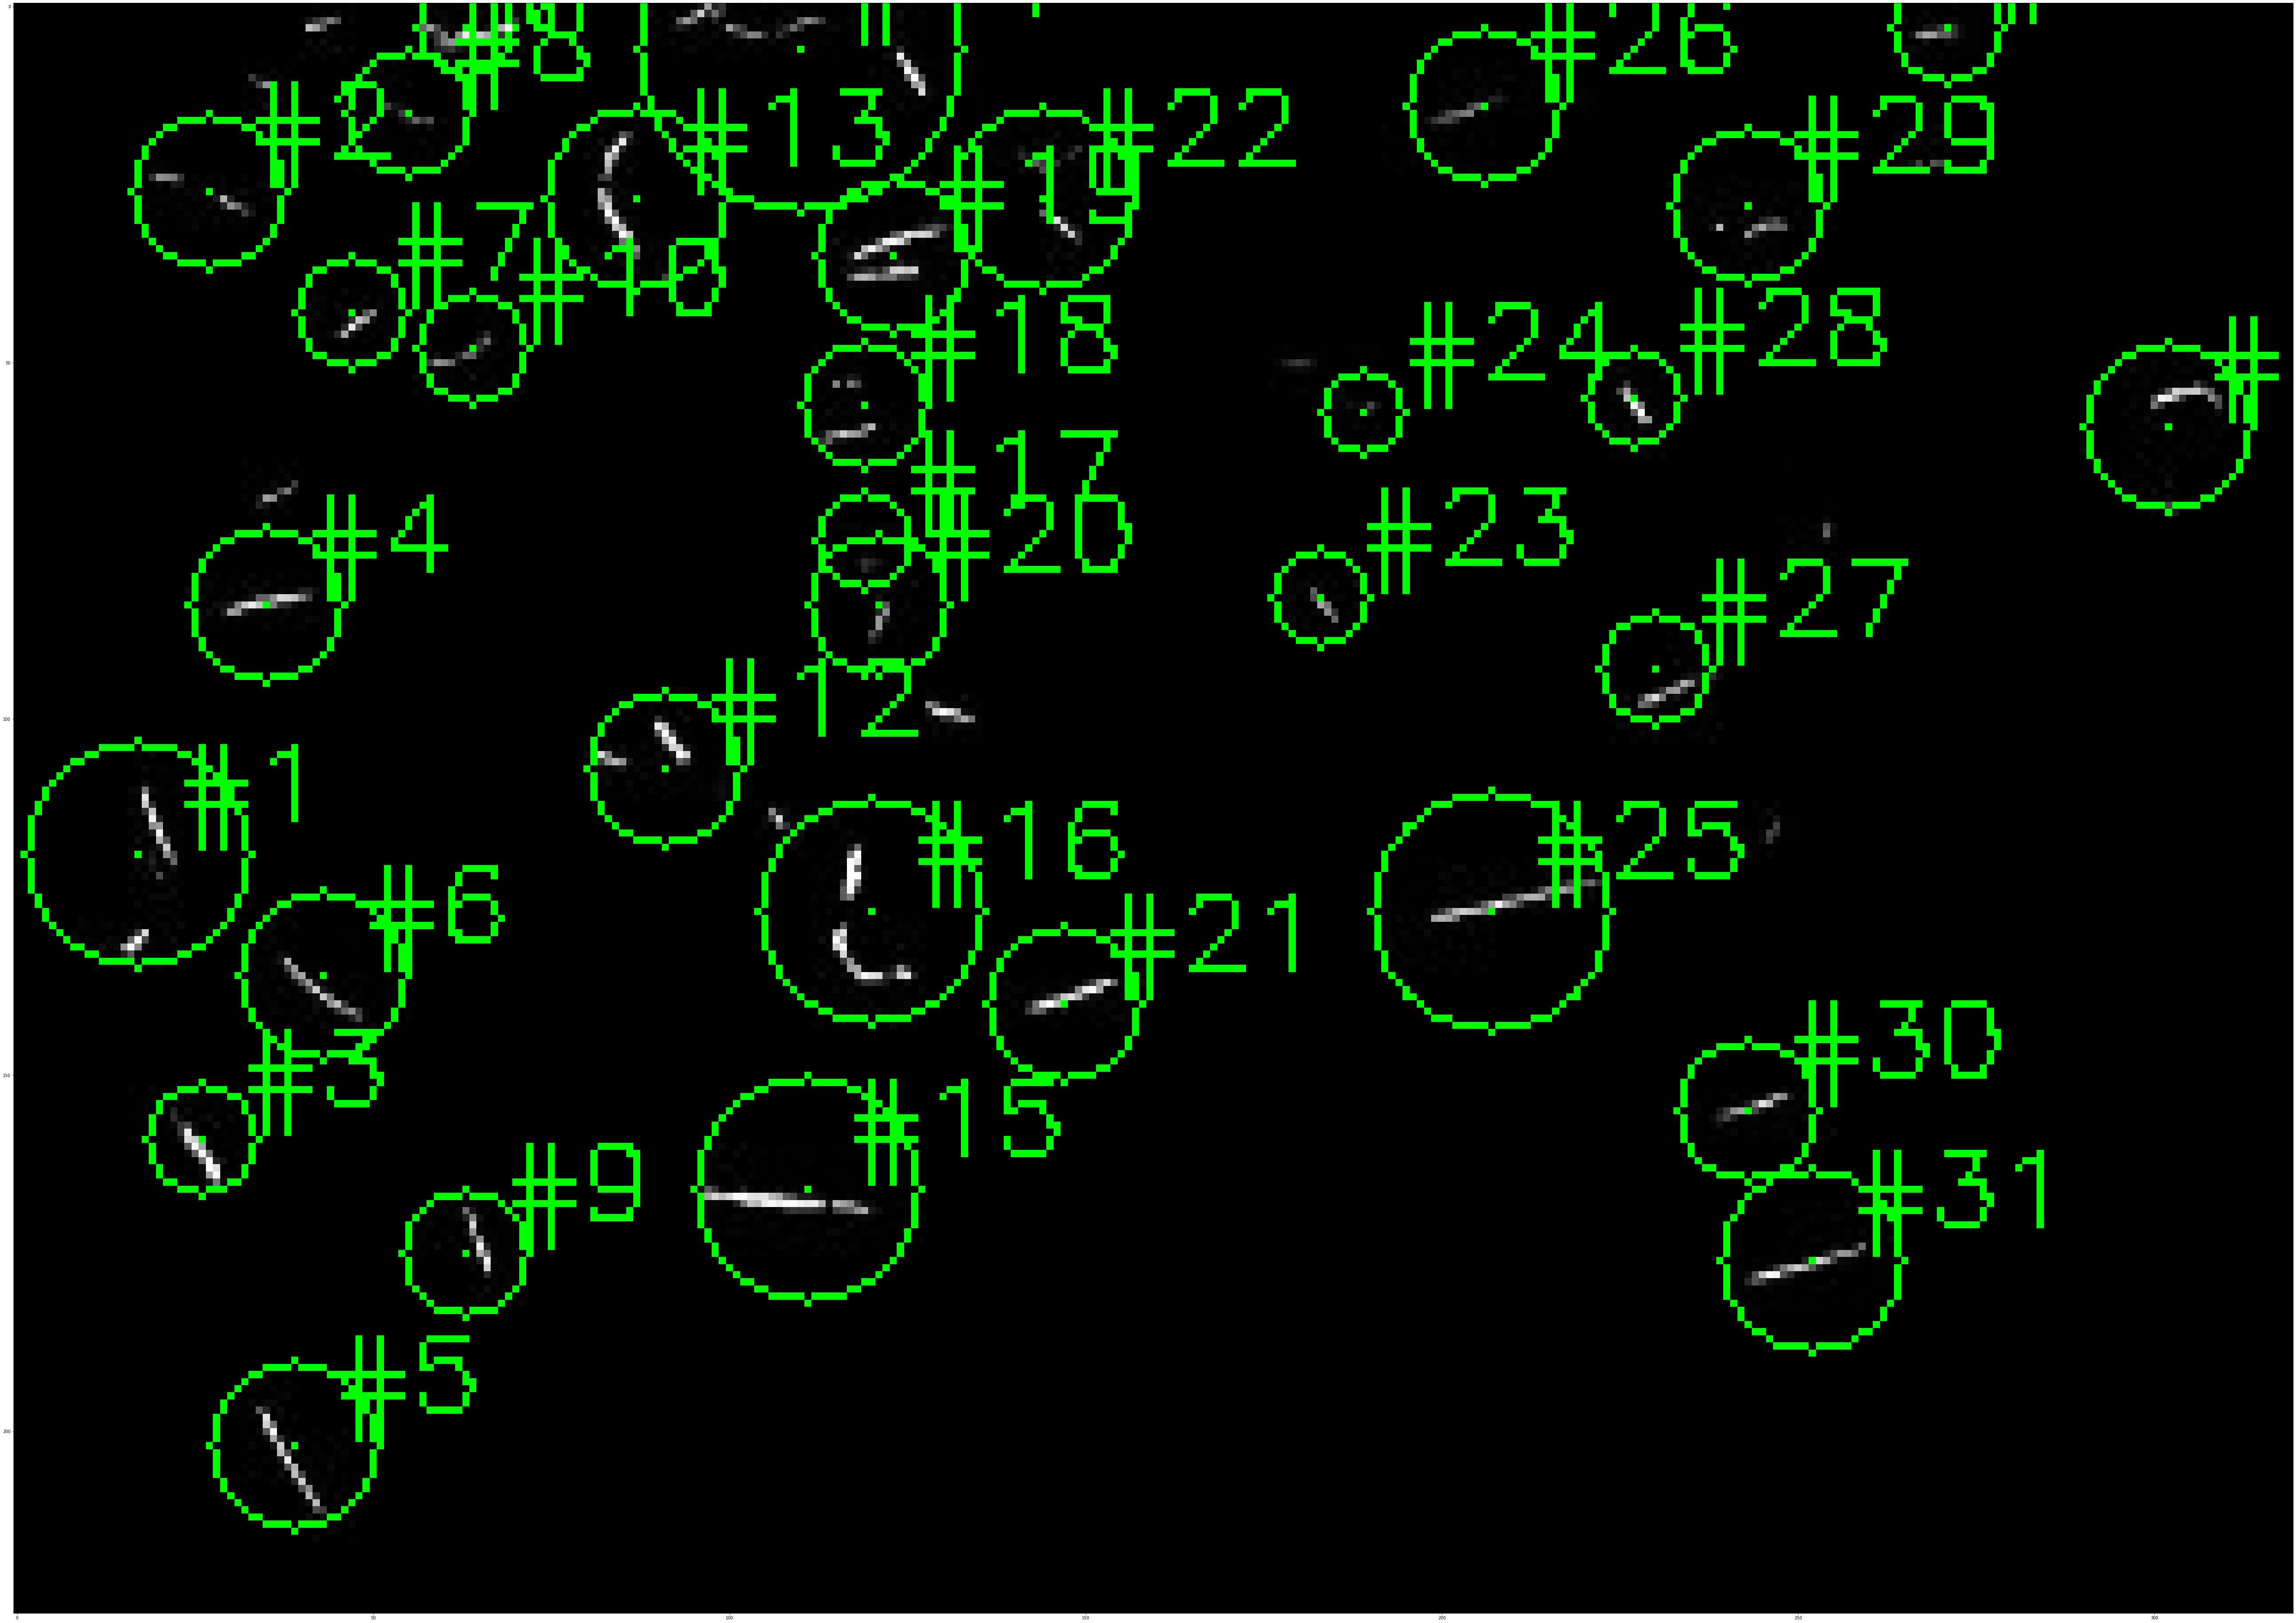

In [71]:
# Display image

plt.figure(figsize=(100,100))
plt.imshow(im1)

In [72]:
# create dataframe with root information from dictionary

image1 = pd.DataFrame.from_dict(im1_COORDINATES, orient='index', columns=['Image','(X,Y) coordinates', 'Radius','Lenght change'])

In [73]:
image1 

,Image,"(X,Y) coordinates",Radius,Lenght change
1,1.jpeg,"(17, 119)",16,0
2,1.jpeg,"(27, 26)",11,0
3,1.jpeg,"(26, 159)",8,0
4,1.jpeg,"(35, 84)",11,0
5,1.jpeg,"(39, 202)",12,0
6,1.jpeg,"(43, 136)",12,0
7,1.jpeg,"(47, 43)",8,0
8,1.jpeg,"(55, 15)",9,0
9,1.jpeg,"(63, 175)",9,0
10,1.jpeg,"(64, 48)",8,0


In [74]:
# save data to csv-file

image1.to_csv('outputCSV.csv', sep=';', index_label='ImageID')